In [17]:
import pandas as pd

In [18]:
path = '/content/drive/MyDrive/ML projects/Logistic/advertising.csv'
data = pd.read_csv(path)
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [19]:
data.Timestamp=pd.to_datetime(data.Timestamp)
data['hour']=data.Timestamp.apply(lambda x: x.hour)
data['clicks_hour']=data.groupby('hour')['Clicked on Ad'].transform('sum')


In [20]:
data['minute']=data.Timestamp.apply(lambda x: x.minute)
data['clicks_minute']=data.groupby('minute')['Clicked on Ad'].transform('sum')

In [21]:
data['second']=data.Timestamp.apply(lambda x: x.second)
data['clicks_second']=data.groupby('second')['Clicked on Ad'].transform('sum')

In [22]:
data['day']=data.Timestamp.apply(lambda x: x.day)
data['clicks_day']=data.groupby('day')['Clicked on Ad'].transform('sum')


In [23]:
data = data.drop(['Ad Topic Line','City', 'Country'],axis =1)

In [24]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,hour,clicks_hour,minute,clicks_minute,second,clicks_second,day,clicks_day
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0,0,26,53,9,11,5,27,16
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0,1,16,39,12,2,10,4,14
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0,20,24,35,5,42,10,13,17
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0,2,17,31,8,19,10,10,19
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0,3,23,36,12,18,9,3,26


In [43]:
feature = data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male','clicks_day']]

In [44]:
label = data['Clicked on Ad']

In [45]:
from sklearn.model_selection import train_test_split
trainF,testF,trainL,testL = train_test_split(feature,label,test_size = .2)

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)

In [47]:
model.fit(trainF,trainL)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
pred = model.predict(testF)

In [49]:
from sklearn.metrics import plot_confusion_matrix,classification_report
print(classification_report(pred,testL,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       103
           1       0.94      0.98      0.96        97

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



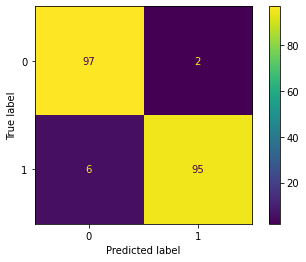

In [50]:
plot_confusion_matrix(model,testF,testL)